<center><h1>QBUS6850: Tutorial 6 - High Dimensional Classification</h1></center>



**Objectives**  
- Get familiar with Hard margin, Soft margin and Soft margin with kernel SVM
- Apply SVM algorithm by using scikit-learn library

**Tasks**
- Hard and Soft Margin SVM
- Linear SVM with non-linear data
- Kernel SVM with non-linear data
- SVM for facial recognition [Optional]

**Review: Lecture 5**


**Review: tutorial 5**
1. KNN   
    `from sklearn import neighbors`    
    `clf = neighbors.KNeighborsClassifier(n_neighbor_1)`   
    `clf.fit(X_train, y_train)`   
    `clf.predict(X_test)`  
    `cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy')`
    
    
2. K-means   
    `from sklearn.cluster import KMeans`  
    `KMeans(n_clusters, random_state).fit_predict(X)`

Support Vector Machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. An SVM model is a representation of the examples as points in space, mapped so that the examples of the <span class="mark">separate categories are divided by a clear gap that is **as wide as possible**.</span> New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the kernel trick, implicitly <span class="girk">mapping their inputs into high-dimensional feature spaces</span>. In this tutorial, we will discuss the SVMs for linearly separable cases (Hard margin SVMs), and SVMs for not linearly separable cases (Soft margin SVMs and Soft margin with kernel SVMs). 

Since today we have a lot of equations, below is the check list of all the important equations in case you may get lost:
- Decision boundary of SVM
- Distance function
- Margin function
- Optimization/Loss function for hard margin SVM
- Optimization/Loss function for soft margin SVM
- RBF kernel for SVM

## 1. Hard margin SVMs
Compared with Logistic Regression, SVMs introduce the 2 margin functions based on the decision boundary function so that they could generally introduce more <span class="girk">robust</span> solutions.

Let’s start with the decision boundary of SVMs. Suppose you have a set of observations 𝑥 which are consisted with 2 feature columns $x = (x_{0}, x_{1}, x_{2})$ ($x_{0}$ is normally treated as 1), and a weight vector $\beta = (\beta_{0}, \beta_{1}, \beta_{2}$) where $\beta_{0}$ is normally regarded as the intercept factor. Therefore, it is easy to have the
following equation as the decision boundary (the purple line in the following figure):

\begin{array}{c}
{0=\beta_{0} x_{0}+\beta_{1} x_{1}+\beta_{2} x_{2}} \\ 
{\text { Or, } 0=\beta_{0}+\beta_{1} x_{1}+\beta_{2} x_{2}}
\end{array}

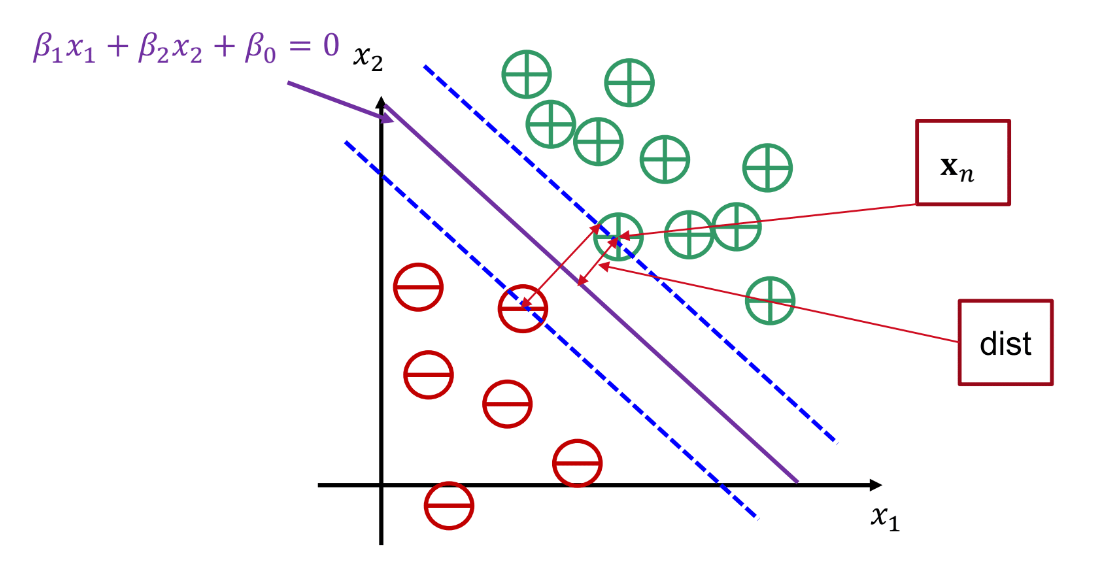

Based on this decision boundary function, suppose you have a special observation $x_{n}=\left(x_{n 1}, x_{n 2}\right)$ is the closest observation to boundary function. Therefore, the <span class="girk">distance</span> from $x_{n}$ to the decision boundary could be calculated as:
$$
d=\frac{\left|\beta_{0}+\beta_{1} x_{n 1}+\beta_{2} x_{n 2}\right|}{\|\beta\|}
$$

We then treat this observation as the starting point to design our margin function, as displayed with the dashed line in the above figure. Since this dashed line and the decision boundary share the same “slope” ($\beta$), for margin function that passes the $x_{n}=\left(x_{n 1}, x_{n 2}\right)$ could be defined as:
$$
\beta_{0}+\beta_{1} x_{n 1}+\beta_{2} x_{n 2}=\pm c
$$

Or with a normalized or standardized dataset,
$$
\left|\beta_{0}+\beta_{1} x_{n 1}+\beta_{2} x_{n 2}\right|=1
$$

Note that the reason of <span class="girk">only selecting the closest observation</span> as the starting point to draw our margin function is preventing every observation from falling into the margin.

For observations outside the margin should satisfy the following constraints:
$$
\beta_{0}+\beta_{1} x_{n 1}+\beta_{2} x_{n 2} \geq 1 \text { for } t_{n}=1
$$

And
$$
\beta_{0}+\beta_{1} x_{n 1}+\beta_{2} x_{n 2} \leq-1 \text { for } t_{n}=-1
$$

Therefore, the final margin (of +1 and -1 classes) of SVM could be further defined as:
$$
\operatorname{margin}=2 \times d=\frac{2 \times\left|\beta_{0}+\beta_{1} x_{n 1}+\beta_{2} x_{n 2}\right|}{\|\beta\|}=\frac{2}{\|\beta\|}
$$

Now we have the representation for all the samples on the margin function, which is:
$$
t_{n}\left(\beta_{0}+\beta_{1} x_{n 1}+\beta_{2} x_{n 2}\right)=1 \text { for } t_{n}=\pm 1
$$

Considering the observations outside the margin:
$$
t_{n}\left(\beta_{0}+\beta_{1} x_{n 1}+\beta_{2} x_{n 2}\right) \geq 1 \text { for } t_{n}=\pm 1
$$

Finally, optimizing the above constraints by maximizing the 𝒎𝒂𝒓𝒈𝒊𝒏 = $\frac{2}{\|\beta\|}$ is equivalent to minimizing the weight factor $\frac{\|\beta\|}{2}$, which subject to $t_{n}\left(\beta_{0}+\beta_{1} x_{n 1}+\beta_{2} x_{n 2}\right) \geq 1$.

As you can see, the maximum margin is completely determined by those $x_{n}=\left(x_{n 1}, x_{n 2}\right)$ that lie nearest to the margin function. Therefore, the $x_n$ that passes the margin function could be called as support vectors.

For more detailed explanation and optimization of Hard margin SVMs, please refer to page 11-17 of Week05 lecture slide.

## 2. Soft margin SVM
Hard margin SVM is only suitable for linearly separable cases. However, most existing datasets are not that ideal and the samples are distributed more complicated (i.e. linearly inseparable). 

For example, it is impossible to find out a straight line (hyperplane) to perfectly separate the following 2 classes, though based on our understanding, the “+” sample in the bottom-left corner and the “-” sample in the top-right corner is more likely to be outliers.
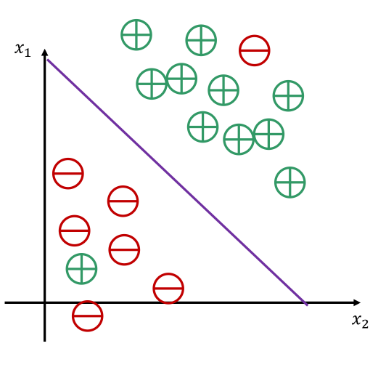

If you still recall, Hard margin SVM targets in finding the correct observation that lie nearest to the margin function, without any tolerance to mis-classification. Therefore, we can’t directly obtain hard margin SVMs for this kind of data.

In order to solve the above problem, we further introduce a new factor in our optimization function, that is:
$$
\min _{\beta, \xi_{n} \geq 0} \frac{1}{2}\|\beta\|^{2}+C \sum_{i=1}^{N} \xi_{n}
$$

Here, $\xi_{n}$ denote <span class="mark">the distance of current sample to the margin boundary</span>, which is subject to:
$$
t_{n}\left(\beta_{0}+\beta_{1} x_{n 1}+\beta_{2} x_{n 2}\right) \geq 1-\xi_{n} \text { and } \xi_{n} \geq 0 \text { for all } n
$$

Therefore, the entire optimization function could be regarded as:
1. Maximum the margin, and 
2. Minimize the sum of distances between each sample to margin boundaries.

We use <span class="girk">hyperparameter C</span> to trade-off margin width and mis-classification.


**Question**:
1. What will happen if <span class="burk">C is set to a very large value</span>?  
When C is very large, means it is easier for us to penalize $C \sum_{i=1}^{N} \xi_{n}$ (Penalize the margin-violation). Therefore, the soft margin SVM turns to hard margin SVM (as less chance for mis-classification).
2. What will happen if <span class="burk">C is set to a very small value</span>?  
When C is very small, means it is easier to penalize $\frac{1}{2}\|\beta\|^{2}$ (Obtain a large margin), but more tolerance to the mis-classification.

## Task 1:  Hard and Soft Margin SVM
Now we come to the implementation of SVM in `sklearn`.

Let’s starting with generate some data to play. As usual, load the numpy, sklearn and matplotlib libs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

Then we randomly generate 2 classes:

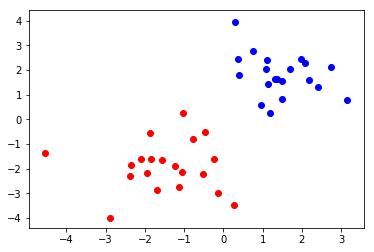

In [2]:
# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], # (mean, variance) = (0-2, 1); size = (20, 2)
          np.random.randn(20, 2) + [2, 2]] # (mean, variance) = (0+2, 1); size = (20, 2)

Y = [0] * 20 + [1] * 20

plt.figure()
plt.scatter(X[:20,0],X[:20,1],c = 'red')
plt.scatter(X[20:,0],X[20:,1],c = 'blue');

Once we got the data, we can call `svm.SVC()` function to declare a SVM model. We will still follow the training pipeline in sklearn library:
> 1. Model declaration
> 2. Start training session by calling `.fit()` function
> 3. Start test session by calling `.predict()` function

In [3]:
# For example
clf = svm.SVC(kernel='linear', C = 0.05)
clf.fit(X, Y)
clf.predict(X[10:30,:])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Let’s compare the performance of hard and soft margin SVM. However, it is <span class="burk">hard to train a pure hard margin SVM</span> in `sklearn` library. Therefore, we could have a <span class="girk">very large C value to approximate the hard margin SVM</span>. For example, let’s compare the performance of C=500 (approximate hard margin) and C=0.05 (soft margin).

Read the following code carefully and pay attention to the inline comments.

In [5]:
clf.coef_[0]
# clf.intercept_

array([0.42444912, 0.37264753])

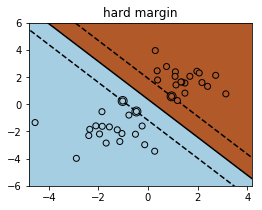

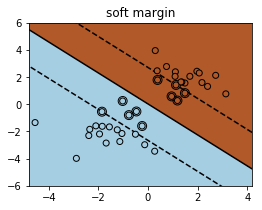

In [5]:
np.random.seed(0)
# figure number
fignum = 1
# fit the model
for name, penalty in (('hard margin', 500), ('soft margin', 0.05)):
    clf = svm.SVC(kernel = 'linear', C = penalty)
    clf.fit(X, Y)
    
    # decision boundary: b_0 + b_1 * xx + b_2 * yy = 0
    w = clf.coef_[0]  # [beta_1, beta_2]
    a = - w[0] / w[1] 
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1] 
    
    # plot the parallels to the separating hyperplane that pass through the support vectors 
    # (margin away from hyperplane in direction perpendicular to hyperplane). 
    # This is sqrt(1+a^2) away vertically in 2d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin
    
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-') # decision boundary
    plt.plot(xx, yy_down, 'k--') # down_margin boundary
    plt.plot(xx, yy_up, 'k--') # up_margin boundary
    
    # plot the support_vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
    facecolors='none', zorder=10, edgecolors='k')
    
    # plot all the samples
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
    edgecolors='k')
    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    
    # generate the background color for each class
    # we directly use prediction function to get the classification results of the given meshgrid
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)
    plt.title(name)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    fignum = fignum + 1
    
plt.show()

## Task 2: Linear SVMs with non-linear data
We call `np.random.multivariate_normal()` function to generate random samples (t = +1) from a multivariate normal distribution. In order to successfully launch this function, we need to declare the mean, covariance, and number of samples. 

The following code example generate 100 samples with (0,0) as central and a covariance of (10,10) across x1 and x2 axis.

In [19]:
# 1 - Intialise the RNG
np.random.seed(1)

# 2 - Set the number of points to be created in each class
N = 100

# 3 - Generate the inner data
inner_mean = (0, 0)
inner_cov = [[10, 0], 
             [0, 10]]

inner = np.random.multivariate_normal(inner_mean, inner_cov, N)

Then we generate some random samples for t = -1 and plot all the samples together:

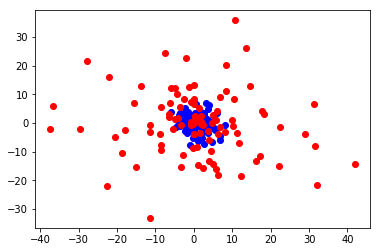

In [20]:
# 4 - Generate the outer data
dist_mean = 10
dist_var = 14

radius = dist_var * np.random.randn(N, 1) + dist_mean
angles = np.random.rand(N, 1) * (2*np.pi)
outer_x = radius * np.cos(angles)
outer_y = radius * np.sin(angles)
outer = np.concatenate( (outer_x, outer_y), axis = 1)

# 5 - Plot the data
fig0 = plt.figure()
plt.plot(inner[:,0], inner[:,1], 'o', color = 'b')
plt.plot(outer[:,0], outer[:,1], 'o', color = 'r');

Next, we combine the two groups of points into a single matrix X. Since the SVM classifier function expects a single data matrix. We also create a label or target vector y.

In [25]:
X = np.concatenate((inner, outer), axis = 0)
y = np.concatenate((np.ones(N), np.zeros(N)) , axis = 0)

We then generate a set of x,y locations via meshgrid() function. These will then be fed into the `predict()` function of our SVM classifiers. Then we can plot the result of each x,y position to show the boundary of the classifiers.

In [26]:
from matplotlib.colors import ListedColormap

# Meshgrid resolution
h = .02

# Meshgrid colours
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# Meshgrid boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create the meshgrid coords
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Train a linear SVM. You can also manually define a C value for your SVM to compare the outcome.

In [28]:
# Fit the SVM classifier
linear_clf = svm.SVC(kernel = "linear")
linear_clf.fit(X, y)

# Get predictions over the whole meshgrid
Z = linear_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Finally, plot the decision boundary and the classification of individual data points

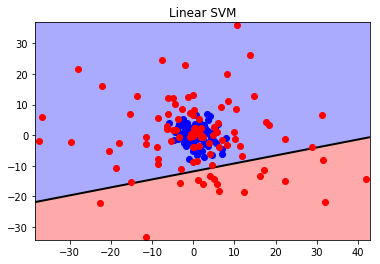

In [32]:
# Plot the mesh
fig1 = plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.title('Linear SVM')

# Plot the decision boundary
decis = linear_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
decis = decis.reshape(xx.shape)
plt.contour(xx, yy, decis, levels = [0], linewidths = 2, colors = 'k')

# Overlay the original points
plt.plot(inner[:,0], inner[:,1], 'o', color = 'b')
plt.plot(outer[:,0], outer[:,1], 'o', color = 'r');

It is obvious, according to the visualization results, that linear SVM is not suitable for nonlinear data.

## Task 3: Kernel SVM with non-linear data

Now we apply the <span class="mark">RBF kernel</span> to our SVM. By doing this, you need to apply further setting in your SVM model declaration. Be patient, the following code is time consuming.

In [ ]:
# fit the SVM model with rbf kernel
kernel_clf = svm.SVC(kernel = "rbf") 
kernel_clf.fit(X, y)

# Get predictions over the whole meshgrid
Z = kernel_clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)

# prepare the decision boundary
decis_kernel = kernel_clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) 
decis_kernel = decis_kernel.reshape(xx.shape)

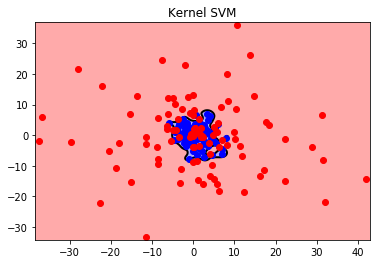

In [36]:
plt.figure()
# Plot the mesh
plt.pcolormesh(xx, yy, Z, cmap = cmap_light) 
plt.title('Kernel SVM')

# Plot the decision boundary
plt.contour(xx, yy, decis_kernel, levels=[0], linewidths=2, linetypes='--', colors='k')

# Overlay the original points 
plt.plot(inner[:,0], inner[:,1], 'o', color = 'b') 
plt.plot(outer[:,0], outer[:,1], 'o', color = 'r')

Then compare your result with the previous outcome. It is obvious that kernel SVM learns a non-linear decision boundary which is suitable for linearly inseparable cases.

## Task 4: SVM for facial recognition (optional)
In this task, we will use SVM for the facial recognition task. 

Facial recognition is a popular category of machine learning and computer vision. This task aims at identifying or verifying a person from a digital image. Therefore, in most cases, we could apply classification algorithm (such as SVM and logistic regression) for this interesting task. 

Generally, most existing models for facial recognition is designed to learn the general pattern of a facial image so that the model could generate the label information of the given facial image. We normally treat the <span class="girk">pixel’s RBG/grey level as the input feature</span> for the machine learning model. For example, one 100x50 image contains 5k pixels/features to describe the entire image. Due to the relatively large size of the original data we will do <span class="mark">dimension reduction</span> to reduce computational load and prevent overfitting problem. Here, we will apply PCA for dimension reduction. These reduced face images are often called "eigenfaces". So far, you don’t need to warry the mathematical details of PCA. We will discuss this famous algorithm in the later tutorials. 

The entire pipeline for this task could be viewed as follow:

- Step1: Load the dataset & data preprocessing
- Step2: PCA for dimension reduction (reduce resolution and extract eigenfaces based on the raw images)
- Step3: SVM for the facial recognition (Classification) 

One last thing is that conventional SVM model is designed for binary class classification (only +1 and -1 class in the entire dataset), which is not suitable for multi-class classification problem. In order to overcome this limitation, we will apply the “one-vs-all” or “one-vs-rest” strategy. 

The `SVC` class in sklearn implements "one-vs-one" classification for multi-class cases. In other words a SVM classifier is built for every pairwise combination of classes.

The `LinearSVC` class implements a "one-vs-rest" classification scheme. A SVM classifier is built for each class and all the remaining classes are grouped into one large "-1" class for a total of n classifiers (except in the two class case, where there is only 1 classifier). 

**Question**:   
Suppose our dataset contains 3 classes. In order to apply the one-vs-rest classification scheme,   
(1) how many SVMs we should train?   
(2) how should we organize the data?   

Let’s come to our code. Load the necessary libraries and load the dataset. 

For this task, we will use `Labeled Faces in the Wild (LFW)` people dataset. The dataset contains more than 13,000 images of faces collected from the web. Each face has been labeled with the name of the person pictured. 1,680 of the people pictured have two or more distinct photos in the data set. For simplicity, we <span class="girk">only extract the classes that obtained 70 more images (samples)</span>. Finally, our filtered dataset contains 1288 samples in total (which could be classified in 7 classes).

### step1: data loading and pre-processing

In [46]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from time import time
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# load dataset with constraints (>= 70 faces in dataset)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape

In [37]:
# define X and y variables
# Use the data vectors directly (as relative pixel positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# The label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# check the basic information
print("Total dataset size:")
print("n_samples: {0}".format(n_samples))
print("n_features: {0}".format(n_features))
print("n_classes: {0}".format(n_classes))

# split training : test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


### step2: PCA for dimension reduction
eigenface_titles = ["Eigenface {0}".format(i) for i in range(eigenfaces.shape[0])]
As you may notice, though we resized each image with a ratio of 0.4, the feature number is still larger than sample number. In this case, if you directly train a SVM for this task, you must have overfitting problem. Therefore, we apply PCA to reduce the input dimensions by limiting each sample only contains <span class="mark">150 features</span>.

In [38]:
# decrease the number of features from 1850 to 150
n_components = 150

print("Extracting the top {0} eigenfaces from {1} faces".format(n_components, X_train.shape[0]))

Extracting the top 150 eigenfaces from 966 faces


In [39]:
# ...with PCA
pca = PCA(n_components = n_components, svd_solver = 'randomized', whiten = True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Projecting the input data on the eigenfaces orthonormal basis


### step3: SVM for classification
Then we optimize the hyper-parameters [C and 𝛾] via Cross Validation:
$$
\exp \left(-\gamma\left\|x-x^{\prime}\right\|^{2}\right)
$$

In [40]:
print("Fitting the classifier to the training set")

# SVM with grid search to find best C and gamma
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], # cost factor
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], } # inverse of sigma

# 5*6 = 30

clf = GridSearchCV(svm.SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)

print("Done in {0:.3f}s".format((time() - t0)))
print("Best estimator found")

Fitting the classifier to the training set
Done in 22.813s
Best estimator found


Evaluating Classification Accuracy based on the best fitting hyper-parameters:

In [41]:
print("Predicting people's names on the test set")

t0 = time()
y_pred = clf.predict(X_test_pca)

print("Done in {0:.3f}s".format((time() - t0)))
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
Done in 0.100s
                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.69      0.58        13
     Colin Powell       0.77      0.88      0.82        60
  Donald Rumsfeld       0.73      0.70      0.72        27
    George W Bush       0.92      0.87      0.89       146
Gerhard Schroeder       0.77      0.80      0.78        25
      Hugo Chavez       0.82      0.60      0.69        15
       Tony Blair       0.88      0.83      0.86        36

        micro avg       0.83      0.83      0.83       322
        macro avg       0.77      0.77      0.76       322
     weighted avg       0.84      0.83      0.83       322

[[  9   0   3   1   0   0   0]
 [  3  53   0   3   0   1   0]
 [  5   1  19   1   0   0   1]
 [  1  11   2 127   4   0   1]
 [  0   2   0   2  20   1   0]
 [  0   0   0   2   2   9   2]
 [  0   2   2   2   0   0  30]]


In [ ]:
precision = 9/(9+5+3+1)
recall = 9/(9+3+1)

Finally, let’s visualize all the classification results:

In [42]:
def plot_gallery(images, titles, h, w, n_row, n_col):
    """Helper function to plot a gallery of portraits"""
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return "Predicted: {0}\ntrue: {1}".format(pred_name, true_name)

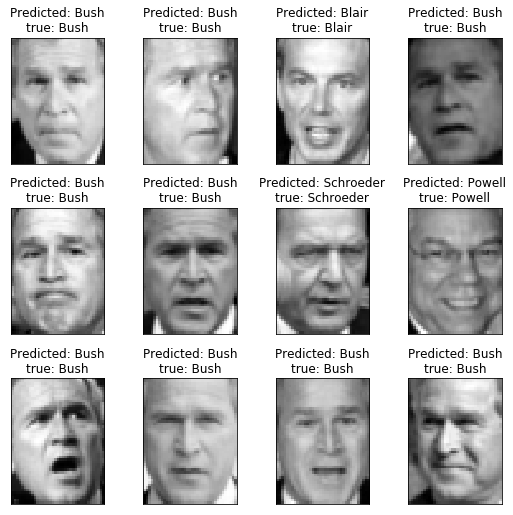

In [43]:
# plot some predictions
prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]

n_col = 4
n_row = 3
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
plot_gallery(X_test, prediction_titles, h, w, n_row, n_col)

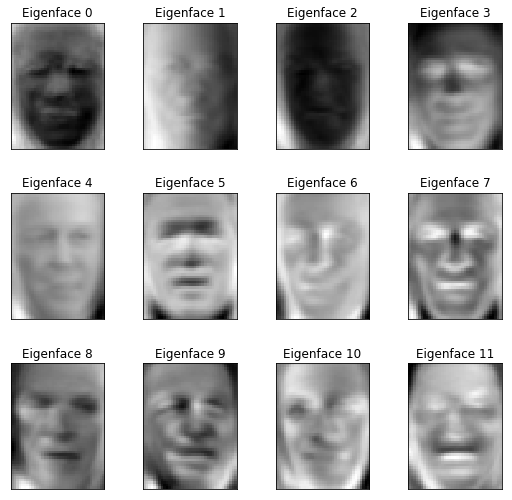

In [45]:
# Plot eigenface
eigenface_titles = ["Eigenface {0}".format(i) for i in range(eigenfaces.shape[0])]

plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row, n_col)